In [1]:
import keras.callbacks
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# 데이터 불러오기
learn_csv_file = pd.read_csv('csv_files/side_view_learn_not_walk.csv')
valid_csv_file = pd.read_csv('csv_files/side_view_vaild_not_walk.csv')
test_csv_file = pd.read_csv('csv_files/side_view_test_not_walk.csv')

learn_csv_file = sklearn.utils.shuffle(learn_csv_file)
valid_csv_file = sklearn.utils.shuffle(valid_csv_file)

col = 34

learn_x = learn_csv_file.iloc[:,:col].values
learn_y = learn_csv_file.iloc[:,col:].values
valid_x = valid_csv_file.iloc[:,:col].values
valid_y = valid_csv_file.iloc[:,col:].values
test_x = test_csv_file.iloc[:,:col].values
test_y = test_csv_file.iloc[:,col:].values


# 표준화 : 사이킷런 사용 (Standard Scaling)
scaler = StandardScaler()
scaler.fit(learn_x)
learn_x_scaled = scaler.transform(learn_x)
valid_x_scaled = scaler.transform(valid_x)
test_x_scaled = scaler.transform(test_x)

# 표준화 (Standard Scaling)
# mean = learn_x.mean(axis=0)
# std = learn_x.std(axis=0)
# learn_x = (learn_x - mean) / std
# valid_x = (valid_x - mean) / std

# one-hot encoding
learn_y = tf.keras.utils.to_categorical(learn_y)
valid_y = tf.keras.utils.to_categorical(valid_y)
test_y = tf.keras.utils.to_categorical(test_y)

# 첫번째 모델
# 모델 구성 (multi-class classification)
model = Sequential()

# 은닉층 5개 / 출력층 4개
model.add(Dense(128, activation='relu', input_shape=(col,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

# 모델 training
after_data = model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=100, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = model.predict(test_x_scaled)
model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
model.save("trained_models/first_side_five_hidden_depth.h5")

2022-09-15 15:42:07.164137: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Epoch 1/100


2022-09-15 15:42:08.498359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 15:42:08.516596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-15 15:42:08.516612: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-15 15:42:08.517104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

60/60 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.8879 - val_loss: 0.1889 - val_accuracy: 0.9453
Epoch 2/100
60/60 [==============================] - 0s 945us/step - loss: 0.0945 - accuracy: 0.9759 - val_loss: 0.1178 - val_accuracy: 0.9635
Epoch 3/100
60/60 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9856 - val_loss: 0.1185 - val_accuracy: 0.9711
Epoch 4/100
60/60 [==============================] - 0s 910us/step - loss: 0.0393 - accuracy: 0.9892 - val_loss: 0.0807 - val_accuracy: 0.9782
Epoch 5/100
60/60 [==============================] - 0s 985us/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0920 - val_accuracy: 0.9782
Epoch 6/100
60/60 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9943 - val_loss: 0.0705 - val_accuracy: 0.9787
Epoch 7/100
60/60 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.0945 - val_accuracy: 0.9772
Epoch 8/100
60/60 [

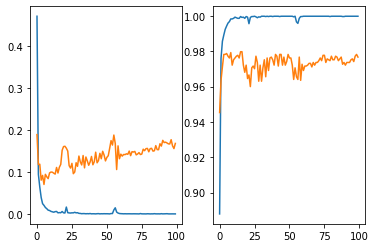

In [2]:
# 시각화
# 손실, 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(after_data.history['loss'])
plt.plot(after_data.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(after_data.history['accuracy'])
plt.plot(after_data.history['val_accuracy'])
plt.show()

In [3]:
# 2번째 모델
# 모델 구성 (multi-class classification)
from tensorflow.keras import regularizers

second_model = Sequential()

# 은닉층 노드 128개, 2개의 층 / 출력층 4개 / Dropout 비율 0.5 / l1, l2 규제 학습률 0.01
second_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(col,)))
second_model.add(Dropout(0.5))
second_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(col,)))
second_model.add(Dropout(0.5))
# second_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01), input_shape=(col,)))
# second_model.add(Dropout(0.5))
second_model.add(Dense(3, activation='softmax'))

# early-stopping 적용
early_stop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
best_save = keras.callbacks.ModelCheckpoint(filepath='trained_models/second_model_side_two_hidden_depth.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch', options=None)

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 training
second_after_data = second_model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=100, validation_data=(valid_x_scaled, valid_y), callbacks=[early_stop_callback, best_save])

# 모델 test (predict)
print()
predict_result = second_model.predict(test_x_scaled)
second_model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
#second_model.save("trained_models/second_model_side_two_hidden_depth.h5")



Epoch 1/100
 1/60 [..............................] - ETA: 12s - loss: 3.3318 - accuracy: 0.2100
Epoch 1: val_loss improved from inf to 1.42607, saving model to trained_models/second_model_side_two_hidden_depth.h5
60/60 [==============================] - 0s 2ms/step - loss: 2.0370 - accuracy: 0.8077 - val_loss: 1.4261 - val_accuracy: 0.9352
Epoch 2/100
 1/60 [..............................] - ETA: 0s - loss: 1.4079 - accuracy: 0.9700
Epoch 2: val_loss improved from 1.42607 to 0.90439, saving model to trained_models/second_model_side_two_hidden_depth.h5
60/60 [==============================] - 0s 1ms/step - loss: 1.1391 - accuracy: 0.9571 - val_loss: 0.9044 - val_accuracy: 0.9407
Epoch 3/100
49/60 [=======================>......] - ETA: 0s - loss: 0.7608 - accuracy: 0.9665
Epoch 3: val_loss improved from 0.90439 to 0.61436, saving model to trained_models/second_model_side_two_hidden_depth.h5
60/60 [==============================] - 0s 2ms/step - loss: 0.7380 - accuracy: 0.9661 - val_loss

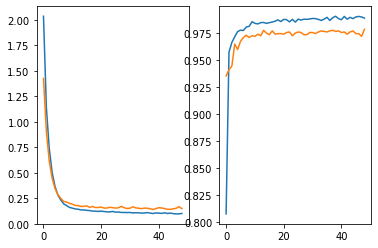

In [4]:
# 시각화
# 손실, 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(second_after_data.history['loss'])
plt.plot(second_after_data.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(second_after_data.history['accuracy'])
plt.plot(second_after_data.history['val_accuracy'])
plt.show()